# EDA: describe

Es una ampliacion de la informacion descriptiva del metodo *describe()* de *Pandas*.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from datetime import datetime
from analysis import describe_numeric, describe_categorical, info, describe_datetime, describe_bivariate

---
## LOAD *Iris* data

In [2]:
# load dataset
dataset = load_iris()
dataset.keys()
# dataset to df
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data['class'] = dataset.target
dclass = dict()
for i, ic in enumerate(dataset.target_names):
    dclass[i] = ic
data['class'] = data['class'].map(dclass)

# descriptive analysis: *Iris* 

In [3]:
info(data)

,types,unique,magnitude,%nan,num_records
variable,,,,,
sepal length (cm),float64,NaN,0.0,0.0,150
sepal width (cm),float64,NaN,0.0,0.0,150
petal length (cm),float64,NaN,0.0,0.0,150
petal width (cm),float64,NaN,0.0,0.0,150
class,object,3.0,NaN,0.0,150


### numerical

In [4]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

,count,mean,std,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
sepal length (cm),150,5.84,0.83,4.3,4.60,5.1,5.80,6.4,7.25,7.9,-0.57,0.31,False,False,True
sepal width (cm),150,3.06,0.44,2.0,2.34,2.8,3.00,3.3,3.80,4.4,0.18,0.32,False,True,True
petal length (cm),150,3.76,1.77,1.0,1.30,1.6,4.35,5.1,6.10,6.9,-1.40,-0.27,False,False,False
petal width (cm),150,1.20,0.76,0.1,0.20,0.3,1.30,1.8,2.30,2.5,-1.34,-0.10,False,False,True


### categorical

In [5]:
# describe
dfc = describe_categorical(data, max_size_cats = 3, alpha = .05)
dfc

,count,unique,uniform,value0,value1,value2,%value0,%value1,%value2
var,,,,,,,,,
class,150,3,True,versicolor,setosa,virginica,33.33,33.33,33.33


### bivariate relationship

In [6]:
describe_bivariate(data)

,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,samples_same_dist_anova
0,sepal length (cm),sepal width (cm),False,-0.12,0.28,NaN,NaN
1,sepal length (cm),petal length (cm),True,0.87,0.77,NaN,NaN
2,sepal length (cm),petal width (cm),True,0.82,0.67,NaN,NaN
3,sepal width (cm),petal length (cm),True,-0.43,0.44,NaN,NaN
4,sepal width (cm),petal width (cm),True,-0.37,0.44,NaN,NaN
5,petal length (cm),petal width (cm),True,0.96,0.92,NaN,NaN
0,class,petal length (cm),NaN,NaN,NaN,NaN,True
1,class,petal width (cm),NaN,NaN,NaN,NaN,True
2,class,sepal length (cm),NaN,NaN,NaN,NaN,True
3,class,sepal width (cm),NaN,NaN,NaN,NaN,True


---
## LOAD *Titanic* data

In [7]:
import seaborn
data = seaborn.load_dataset('titanic')
data.shape

(891, 15)

# descriptive analysis: *Titanic* 

In [8]:
info(data)

,dtype,unique,magnitude,%nan,num_records
variable,,,,,
deck,category,8.0,NaN,77.22,203
sibsp,int64,7.0,NaN,0.00,891
parch,int64,7.0,NaN,0.00,891
embarked,object,4.0,NaN,0.22,889
embark_town,object,4.0,NaN,0.22,889
pclass,int64,3.0,NaN,0.00,891
class,category,3.0,NaN,0.00,891
who,object,3.0,NaN,0.00,891
survived,int64,2.0,NaN,0.00,891


### numerical

In [9]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

,count,mean,std,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
age,714,29.7,14.53,0.42,4.00,20.12,28.00,38.0,56.00,80.00,0.17,0.39,False,False,True
fare,891,32.2,49.69,0.00,7.22,7.91,14.45,31.0,112.08,512.33,33.20,4.78,False,False,True


### categorical

In [10]:
# describe
dfc = describe_categorical(data.copy(), max_size_cats = 4, alpha = .05)
dfc

,count,unique,uniform,value0,value1,value2,value3,%value0,%value1,%value2,%value3
var,,,,,,,,,,,
survived,891,2,False,0,1,,,61.62,38.38,,
pclass,891,3,False,3,1,2,,55.11,24.24,20.65,
sex,891,2,False,male,female,,,64.76,35.24,,
sibsp,891,7,False,0,1,2,others,68.24,23.46,3.14,5.17
parch,891,7,False,0,1,2,others,76.09,13.24,8.98,1.68
embarked,889,3,False,S,C,Q,,72.44,18.9,8.66,
class,891,3,False,Third,First,Second,,55.11,24.24,20.65,
who,891,3,False,man,woman,child,,60.27,30.42,9.32,
adult_male,891,2,False,True,False,,,60.27,39.73,,


### bivariate relationship

In [11]:
describe_bivariate(data)

,variable1,variable2,depend_corr,corr_pearson,corr_spearman,corr_mic,depend_chi2,samples_same_dist_anova
0,age,fare,True,NaN,NaN,0.19,NaN,NaN
0,survived,pclass,NaN,NaN,NaN,NaN,True,NaN
1,survived,sex,NaN,NaN,NaN,NaN,True,NaN
2,survived,sibsp,NaN,NaN,NaN,NaN,True,NaN
3,survived,parch,NaN,NaN,NaN,NaN,True,NaN
4,survived,embarked,NaN,NaN,NaN,NaN,True,NaN
5,survived,class,NaN,NaN,NaN,NaN,True,NaN
6,survived,who,NaN,NaN,NaN,NaN,True,NaN
7,survived,adult_male,NaN,NaN,NaN,NaN,True,NaN
8,survived,deck,NaN,NaN,NaN,NaN,False,NaN


---
## load *Tips* data

In [12]:
import seaborn
data = seaborn.load_dataset('tips')
data.shape

(244, 7)

# descriptive analysis: *Tips* 

In [13]:
info(data)

,dtype,unique,magnitude,%nan,num_records
variable,,,,,
size,int64,6.0,NaN,0.0,244
day,category,4.0,NaN,0.0,244
sex,category,2.0,NaN,0.0,244
smoker,category,2.0,NaN,0.0,244
time,category,2.0,NaN,0.0,244
total_bill,float64,NaN,1.0,0.0,244
tip,float64,NaN,0.0,0.0,244


### numerical

In [14]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

,count,mean,std,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
total_bill,244,19.79,8.90,3.07,9.56,13.35,17.8,24.13,38.06,50.81,1.17,1.13,False,False,True
tip,244,3.00,1.38,1.00,1.44,2.00,2.9,3.56,5.20,10.00,3.55,1.46,False,False,False


### categorical

In [15]:
# describe
dfc = describe_categorical(data, max_size_cats = 6, alpha = .05)
dfc

,count,unique,uniform,value0,value1,value2,value3,value4,value5,%value0,%value1,%value2,%value3,%value4,%value5
var,,,,,,,,,,,,,,,
sex,244,2,False,Male,Female,,,,,64.34,35.66,,,,
smoker,244,2,True,No,Yes,,,,,61.89,38.11,,,,
day,244,4,False,Sat,Sun,Thur,Fri,,,35.66,31.15,25.41,7.79,,
time,244,2,False,Dinner,Lunch,,,,,72.13,27.87,,,,
size,244,6,False,2,3,4,5,6,1,63.93,15.57,15.16,2.05,1.64,1.64


### bivariate relationship

In [16]:
describe_bivariate(data)

,variable1,variable2,depend_corr,corr_pearson,corr_spearman,corr_mic,depend_chi2,samples_same_dist_anova
0,total_bill,tip,True,0.68,0.68,0.46,NaN,NaN
0,sex,smoker,NaN,NaN,NaN,NaN,False,NaN
1,sex,day,NaN,NaN,NaN,NaN,True,NaN
2,sex,time,NaN,NaN,NaN,NaN,True,NaN
3,sex,size,NaN,NaN,NaN,NaN,False,NaN
4,smoker,day,NaN,NaN,NaN,NaN,True,NaN
5,smoker,time,NaN,NaN,NaN,NaN,False,NaN
6,smoker,size,NaN,NaN,NaN,NaN,False,NaN
7,day,time,NaN,NaN,NaN,NaN,True,NaN
8,day,size,NaN,NaN,NaN,NaN,True,NaN


---
## LOAD *Wine* data

In [28]:
from sklearn import datasets
df = datasets.load_wine()
data = pd.DataFrame(data= np.c_[df['data'], df['target']],columns= list(df['feature_names']) + ['target'])
data['target'] = data['target'].apply(lambda x: df['target_names'][int(x)])
data.shape

(178, 14)

# descriptive analysis: *Wine* 

In [29]:
info(data)

,dtype,unique,magnitude,%nan,num_records
variable,,,,,
target,object,3.0,NaN,0.0,178
alcohol,float64,NaN,1.0,0.0,178
malic_acid,float64,NaN,0.0,0.0,178
ash,float64,NaN,0.0,0.0,178
alcalinity_of_ash,float64,NaN,1.0,0.0,178
magnesium,float64,NaN,1.0,0.0,178
total_phenols,float64,NaN,0.0,0.0,178
flavanoids,float64,NaN,0.0,0.0,178
nonflavanoid_phenols,float64,NaN,-1.0,0.0,178


### numerical

In [30]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

,count,mean,std,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
alcohol,178,13.00,0.81,11.03,11.66,12.36,13.05,13.68,14.22,14.83,-0.86,-0.05,False,False,True
malic_acid,178,2.34,1.12,0.74,1.06,1.60,1.87,3.08,4.46,5.80,0.26,1.03,False,False,True
ash,178,2.37,0.27,1.36,1.92,2.21,2.36,2.56,2.74,3.23,1.08,-0.18,False,False,True
alcalinity_of_ash,178,19.49,3.34,10.60,14.77,17.20,19.50,21.50,25.00,30.00,0.44,0.21,False,True,True
magnesium,178,99.74,14.28,70.00,80.85,88.00,98.00,107.00,124.30,162.00,2.01,1.09,False,False,True
total_phenols,178,2.30,0.63,0.98,1.38,1.74,2.36,2.80,3.27,3.88,-0.85,0.09,False,False,True
flavanoids,178,2.03,1.00,0.34,0.55,1.20,2.13,2.88,3.50,5.08,-0.89,0.03,False,False,True
nonflavanoid_phenols,178,0.36,0.12,0.13,0.19,0.27,0.34,0.44,0.60,0.66,-0.65,0.45,False,False,True
proanthocyanins,178,1.59,0.57,0.41,0.73,1.25,1.56,1.95,2.71,3.58,0.51,0.51,False,False,True
color_intensity,178,5.06,2.32,1.28,2.11,3.22,4.69,6.20,9.60,13.00,0.34,0.86,False,False,True


### categorical

In [31]:
# describe
dfc = describe_categorical(data, max_size_cats = 3, alpha = .05)
dfc

,count,unique,uniform,value0,value1,value2,%value0,%value1,%value2
var,,,,,,,,,
target,178,3,True,class_1,class_0,class_2,39.89,33.15,26.97


### bivariate relationship

In [32]:
describe_bivariate(data)

,variable1,variable2,depend_corr,corr_pearson,corr_spearman,corr_mic,depend_chi2,samples_same_dist_anova
0,alcohol,malic_acid,False,0.09,0.14,0.31,NaN,NaN
1,alcohol,ash,True,0.21,0.24,0.23,NaN,NaN
2,alcohol,alcalinity_of_ash,True,-0.31,-0.31,0.26,NaN,NaN
3,alcohol,magnesium,True,0.27,0.37,0.30,NaN,NaN
4,alcohol,total_phenols,True,0.29,0.31,0.33,NaN,NaN
5,alcohol,flavanoids,True,0.24,0.29,0.41,NaN,NaN
6,alcohol,nonflavanoid_phenols,True,-0.16,-0.16,0.19,NaN,NaN
7,alcohol,proanthocyanins,True,0.14,0.19,0.30,NaN,NaN
8,alcohol,color_intensity,True,0.55,0.64,0.50,NaN,NaN
9,alcohol,hue,False,-0.07,-0.02,0.24,NaN,NaN


---
## load *Weather* data

In [2]:
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
data = pd.read_csv(path)
data['datetime'] = pd.to_datetime(data['datetime'])
data['dtnow'] = [datetime(2022,1,1,12,0,0) for i in range(len(data))]
data['dtrandom'] = pd.to_datetime(np.sort(np.random.choice(pd.date_range('2015-01-01', '2018-01-01', freq='H'), len(data), replace=False)))
data.shape

(17544, 16)

# descriptive analysis: *Weather* 

In [14]:
info(data)

,types,unique,magnitude,%nan,num_records
variable,,,,,
datetime,datetime64[ns],17544.0,NaN,0.00,17544
dtnow,datetime64[ns],1.0,NaN,0.00,17544
dtrandom,datetime64[ns],17544.0,NaN,0.00,17544
RH (%),float64,NaN,1.0,0.08,17530
WS (m/s),float64,NaN,0.0,0.06,17533
dew_point (degC),float64,NaN,1.0,0.08,17530
irradiation (MJ/m2),float64,NaN,NaN,40.93,10364
local_press (hPa),float64,NaN,3.0,0.00,17544
precipitation (mm),float64,NaN,NaN,80.52,3417


### numerical

In [24]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

,count,mean,std,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
RH (%),17530,68.47,20.44,13.0,34.0,53.00,70.00,85.00,99.00,100.00,-0.89,-0.22,False,False,True
WS (m/s),17533,2.83,1.43,0.0,1.0,1.80,2.50,3.60,5.60,12.20,1.76,1.12,False,False,True
dew_point (degC),17530,9.77,10.32,-20.1,-7.2,0.90,10.70,19.30,23.90,27.30,-1.14,-0.24,False,False,True
irradiation (MJ/m2),10364,0.92,0.94,0.0,0.0,0.11,0.59,1.58,2.83,3.71,-0.26,0.91,False,False,False
local_press (hPa),17544,1010.94,7.52,965.5,998.5,1005.90,1011.00,1016.30,1022.90,1031.30,0.38,-0.30,False,False,True
precipitation (mm),3417,0.94,2.21,0.0,0.0,0.00,0.00,1.00,4.60,40.00,45.60,5.14,False,False,False
sea-level pressure (hPa),17544,1013.82,7.58,968.2,1001.4,1008.70,1013.90,1019.20,1025.90,1034.40,0.36,-0.29,False,False,True
sunlight_duration (h),9570,0.41,0.43,0.0,0.0,0.00,0.20,1.00,1.00,1.00,-1.65,0.37,False,False,False
temperature (degC),17544,16.17,8.18,-2.2,3.6,9.00,16.40,23.00,28.70,37.30,-1.11,-0.01,False,False,True
vapor_press (hPa),17530,14.62,8.82,1.2,3.6,6.50,12.80,22.30,29.70,36.30,-1.16,0.40,False,False,True


### categorical

In [25]:
# describe
dfc = describe_categorical(data, max_size_cats = 17, alpha = .05)
dfc

,count,unique,uniform,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,%value0,%value1,%value2,%value3,%value4,%value5,%value6,%value7,%value8,%value9,%value10,%value11,%value12,%value13,%value14,%value15,%value16
var,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WD,17533,17,False,NNW,NW,S,SSE,NNE,N,NE,SSW,SE,ENE,WNW,E,ESE,SW,W,WSW,C,15.21,13.43,10.26,9.9,7.21,7.07,6.78,5.27,5.26,4.92,4.81,2.89,2.15,1.76,1.52,1.49,0.07
cloud_coverage,5117,13,False,10-,10,0+,0,9,1,8,2,3,7,6,4,5,,,,,32.21,21.91,9.71,7.64,4.34,3.93,3.89,3.79,3.17,3.01,2.7,2.05,1.66,,,,


### datetimes

In [26]:
dfdt = describe_datetime(data)
dfdt

,count,unique,most_frequent,num_most_frequent,first,last,most_frequent_td,%most_frequent_td,num_td
datetime,17544,17544,NaT,NaN,2016-01-01 00:00:00,2017-12-31 23:00:00,"(0 days 01:00:00,)",100.00,1
dtnow,17544,1,2022-01-01 12:00:00,17544,2022-01-01 12:00:00,2022-01-01 12:00:00,"(0 days 00:00:00,)",100.00,1
dtrandom,17544,17544,NaT,NaN,2015-01-01 01:00:00,2018-01-01 00:00:00,"(0 days 01:00:00,)",66.86,10


### bivariate relationships

In [15]:
describe_bivariate(data, only_dependent=False, is_remove_outliers = False, size_max_sample=500)

,variable1,variable2,depend_corr,corr_pearson,corr_spearman,corr_mic,depend_chi2,samples_same_dist_anova
0,RH (%),WS (m/s),True,-0.27,-0.27,0.14,NaN,NaN
1,RH (%),dew_point (degC),True,0.68,0.66,0.42,NaN,NaN
2,RH (%),irradiation (MJ/m2),True,NaN,NaN,0.27,NaN,NaN
3,RH (%),local_press (hPa),True,-0.24,-0.27,0.18,NaN,NaN
4,RH (%),precipitation (mm),True,NaN,NaN,0.26,NaN,NaN
5,RH (%),sea-level pressure (hPa),True,-0.25,-0.25,0.18,NaN,NaN
6,RH (%),sunlight_duration (h),True,NaN,NaN,0.19,NaN,NaN
7,RH (%),temperature (degC),True,0.29,0.28,0.24,NaN,NaN
8,RH (%),vapor_press (hPa),True,0.62,0.65,0.42,NaN,NaN
9,RH (%),visibility (km),True,NaN,NaN,0.19,NaN,NaN


<AxesSubplot:xlabel='WS (m/s)', ylabel='sea-level pressure (hPa)'>

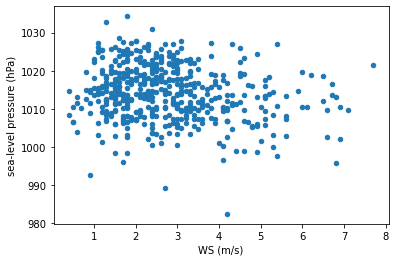

In [28]:
c1 = "WS (m/s)"
c2 = "sea-level pressure (hPa)"
juan = data[[c1, c2]].copy().sample(500)
data1 = juan[c1].values.astype("int64")
data2 = juan[c2].values
juan.plot(kind = "scatter", x = c1, y = c2)

In [29]:
import htest
not htest.correlation_pearson(data1, data2), not htest.correlation_spearman(data1, data2)

(True, True)

In [16]:
htest.correlation_pearson(data1, data2, return_corr = True), htest.correlation_spearman(data1, data2, return_corr = True)

((-0.23230803558684957, 1.4914997692950103e-07),
 (-0.23633063689881714, 8.931673211195257e-08))

In [42]:
## Linear correlation analysis to test independence for numerical / ordinal variables
def analysis_linear_correlation(data1:np.array, 
                                data2:np.array,
                                alpha:float = .05, 
                                return_corr:bool = True, 
                                verbose:bool = False)->bool:
    """
    ## Linear correlation analysis to test independence for numerical / ordinal variables.
    
    data1, date2 -- 1D data to be tested.
    alpha -- Significance level (default, 0.05).
    return_corr -- If is True, return correlation value and his p-value (default, False).
    verbose -- Display extra information (default, False).
    return -- boolean according test result.
    """

    # get types
    type1 = data1.dtype
    type2 = data2.dtype
    # get size
    n = len(data1)

    # ord - ord
    if type1 == "int64" and type2 == "int64":
        # number of categories
        ncat1 = len(np.unique(data1))
        ncat2 = len(np.unique(data2))
        # analysis
        if ncat1 >= 5 and ncat2 >= 5:
            result = htest.correlation_spearman(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)
        else:
            result = htest.correlation_kendalltau(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)

    # num - num
    if type1 == "float64" and type2 == "float64":
        # test if variables are gaussian
        if n >= 5000:
            is_normal1 = htest.test_anderson(data1, alpha = alpha)
            is_normal2 = htest.test_anderson(data2, alpha = alpha)
        else:
            is_normal1 = htest.test_shapiro(data1, alpha = alpha)
            is_normal2 = htest.test_shapiro(data2, alpha = alpha)
        # analysis
        if n >= 100:
            result = htest.correlation_pearson(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)
        else:
            if is_normal1 and is_normal2:
                result = htest.correlation_pearson(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)
            else:
                result = htest.correlation_spearman(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)

    # num - ord
    if (type1 == "float64" and type2 == "int64") or (type1 == "int64" and type2 == "float64"):
        # number of categories
        if type1 == "int64":
            ncat = len(np.unique(data1))
        else:
            ncat = len(np.unique(data2))
        # analysis
        if ncat < 5:
            result = htest.correlation_kendalltau(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)
        else:
            if n >= 100:
                result = htest.correlation_pearson(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)
            else:
                result = htest.correlation_spearman(data1, data2, alpha = alpha, return_corr = return_corr, verbose = verbose)

    # return
    return result


In [43]:
analysis_linear_correlation(data1, data2)

(-0.17707703996581445, 6.85806822198792e-05)